In [59]:
from datetime import datetime

import numpy as np
import pandas as pd
import plotly.express as px
from semanticscholar import SemanticScholar

In [2]:
sch = SemanticScholar()
paper = sch.get_paper("f24dc845602d5b395b3c33697e6edcf29ad5776a")
paper.title

'Mapping poverty at multiple geographical scales'

In [104]:
def get_references(references: list) -> list:
    data = []
    for ref in references:
        if ref["publicationVenue"]:
            if ref["publicationVenue"]["type"]:
                publication_venue_type = ref["publicationVenue"]["type"]
        else:
            publication_venue_type = None
        data.append(
            (
                ref["paperId"],
                ref["title"],
                ref["url"],
                ref["publicationDate"],
                ref["venue"],
                publication_venue_type,
                ref["referenceCount"],
                ref["citationCount"],
            )
        )
    return data


print([k for k in paper.references[0].keys()])
data = get_references(paper.references)
df = pd.DataFrame(
    data,
    columns=[
        "paperId",
        "title",
        "url",
        "publicationDate",
        "venue",
        "publication_venue_type",
        "referenceCount",
        "citationCount",
    ],
)
df.citationCount = df.citationCount.fillna(0)
df["binning"] = pd.qcut(df.citationCount, 8, labels=False)
df["binning"] = df["binning"] + 1
# df['binning'] = pd.cut(df.citationCount, bins=4, labels=False)
df.head()

['paperId', 'externalIds', 'corpusId', 'publicationVenue', 'url', 'title', 'abstract', 'venue', 'year', 'referenceCount', 'citationCount', 'influentialCitationCount', 'isOpenAccess', 'openAccessPdf', 'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes', 'publicationDate', 'journal', 'citationStyles', 'authors']


,paperId,title,url,publicationDate,venue,publication_venue_type,referenceCount,citationCount,binning
0,90405063133184d0ad29b426feb490ece0ce83b9,A review of machine learning and satellite ima...,https://www.semanticscholar.org/paper/90405063...,2023-02-01,Journal of International Development,journal,37.0,2.0,1
1,830d29d57e9c54bff7803aa52b00dc56535b4470,Multivariate mixture model for small area esti...,https://www.semanticscholar.org/paper/830d29d5...,2022-12-01,Journal of the Royal Statistical Society: Seri...,None,27.0,1.0,1
2,d253b41297e7ec43cec7f02401196125188e0824,Guidelines to Small Area Estimation for Povert...,https://www.semanticscholar.org/paper/d253b412...,2022-06-16,,None,0.0,2.0,1
3,2c36a2514c98f47483a40c5152b337a2bc4450c0,A Computationally Efficient Approach to Fully ...,https://www.semanticscholar.org/paper/2c36a251...,2022-03-23,,None,0.0,1.0,1
4,3bba63cd7b14cdcd458a4fa6be8c78d2582cd65c,Accounting for survey design in Bayesian disag...,https://www.semanticscholar.org/paper/3bba63cd...,2021-12-13,Annals of Applied Statistics,journal,51.0,2.0,1


In [123]:
fig = px.scatter(
    df,
    x="publicationDate",
    y="venue",
    # size="binning",
    size="citationCount",
    size_max=80,
    color="citationCount",
    marginal_x="histogram",
    title=f"Paper: {paper.title} ({paper.year})",
    hover_data=["title", "referenceCount", "citationCount"],
)
fig.show()

<Axes: >

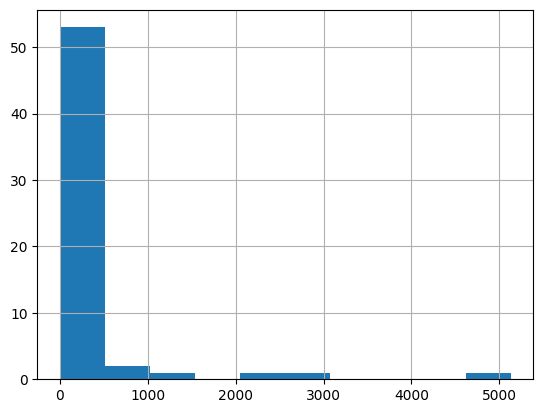

In [96]:
df["citationCount"].hist()

In [49]:
[x for x in paper.keys()]

['paperId',
 'externalIds',
 'corpusId',
 'publicationVenue',
 'url',
 'title',
 'abstract',
 'venue',
 'year',
 'referenceCount',
 'citationCount',
 'influentialCitationCount',
 'isOpenAccess',
 'openAccessPdf',
 'fieldsOfStudy',
 's2FieldsOfStudy',
 'embedding',
 'tldr',
 'publicationTypes',
 'publicationDate',
 'journal',
 'authors',
 'citations',
 'references']